In [2]:
import pandas as pd
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Cargar el dataset en un DataFrame, se divide en dos partes para poder subirlo a github
# Parte1
parte1 = pd.read_csv('data_preparada_movies_parte1.csv')
# Parte2
parte2 = pd.read_csv('data_preparada_movies_parte2.csv')

# Concatenar las partes del dataframe
data = pd.concat([parte1, parte2], ignore_index=True)

In [4]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.545100e+04,45451.000000,45451.000000,4.545100e+04,45205.000000,45451.000000,45451.000000,45451.000000,4.545100e+04
mean,4.231294e+06,107984.599745,2.926887,1.121930e+07,94.181905,5.624085,109.989703,1991.882027,6.589542e+02
std,1.742942e+07,112111.336735,6.006458,6.433984e+07,38.329504,1.915424,491.352336,24.057726,7.463165e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26367.500000,0.389095,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59871.000000,1.131386,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156327.500000,3.694370,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


<AxesSubplot: >

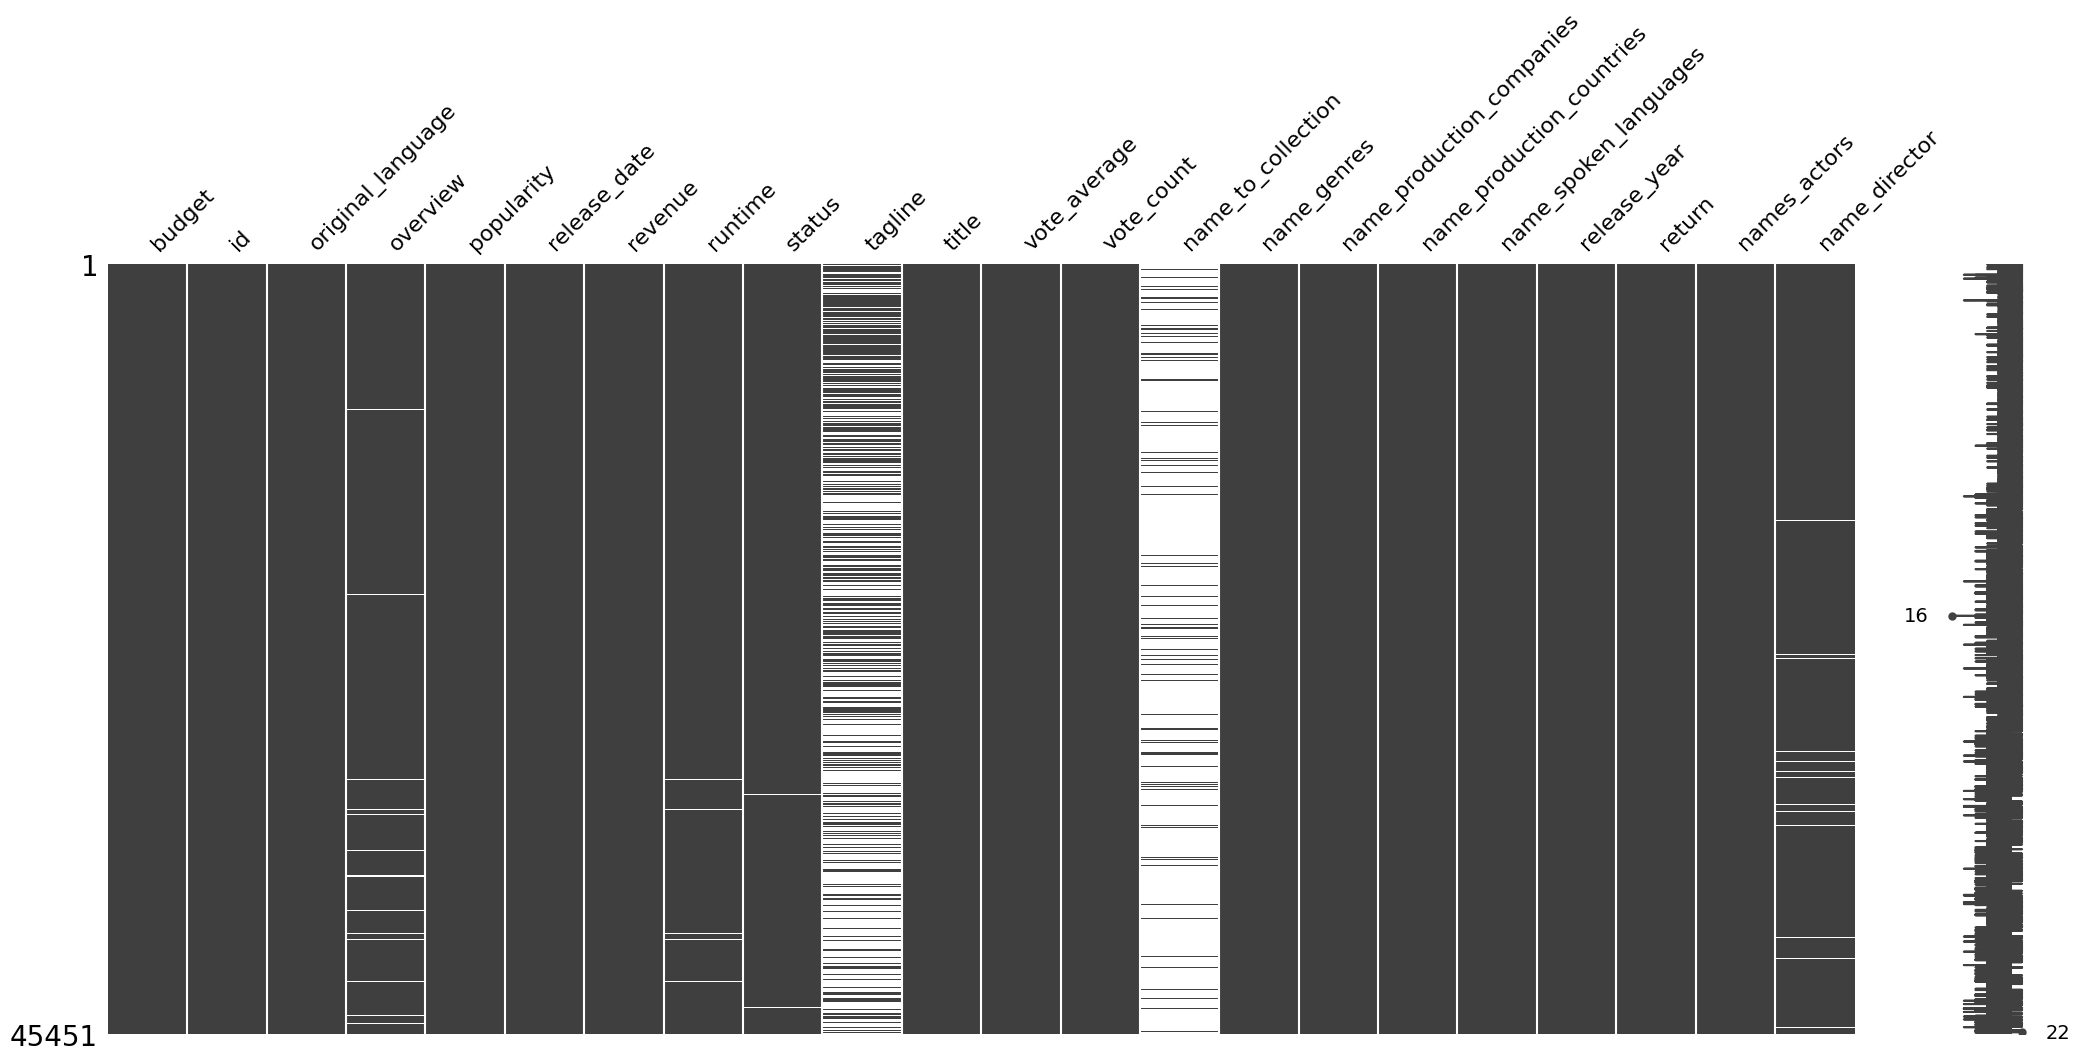

In [5]:
missingno.matrix(data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   budget                     45451 non-null  float64
 1   id                         45451 non-null  int64  
 2   original_language          45440 non-null  object 
 3   overview                   44510 non-null  object 
 4   popularity                 45451 non-null  float64
 5   release_date               45451 non-null  object 
 6   revenue                    45451 non-null  float64
 7   runtime                    45205 non-null  float64
 8   status                     45371 non-null  object 
 9   tagline                    20425 non-null  object 
 10  title                      45451 non-null  object 
 11  vote_average               45451 non-null  float64
 12  vote_count                 45451 non-null  float64
 13  name_to_collection         4497 non-null   obj

C:\Users\Outlet\AppData\Local\Temp\ipykernel_12276\2255139740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


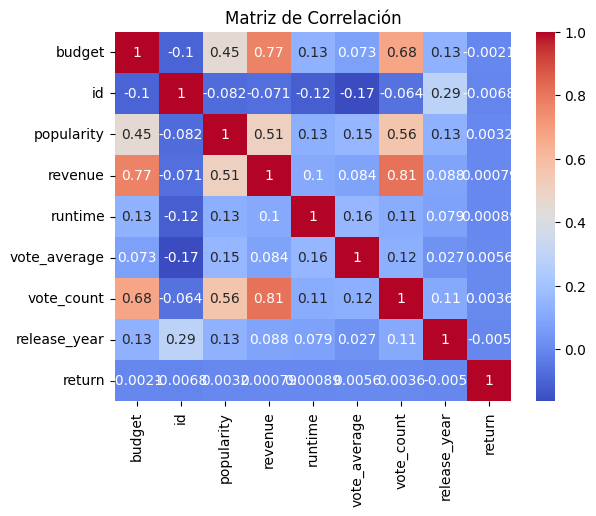

In [7]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

budget
revenue
popularity
vote_average
vote_count
return

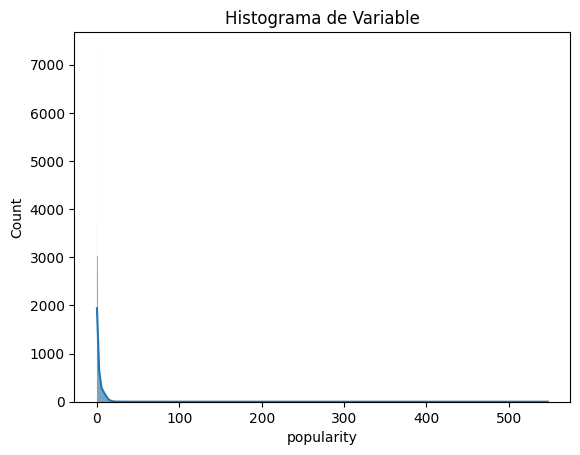

In [8]:
sns.histplot(data=data, x='popularity', kde=True)
plt.title('Histograma de Variable')
plt.show()

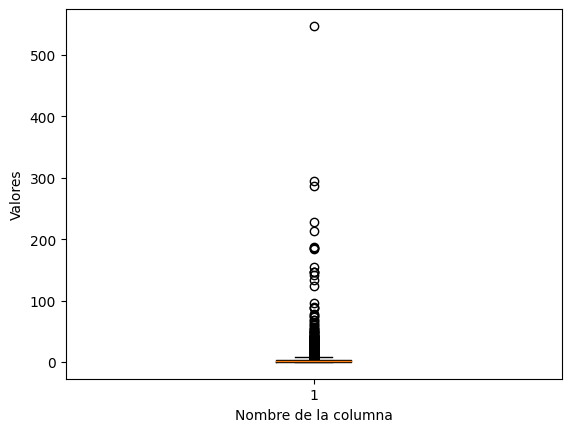

In [9]:
# Crea el gráfico de boxplot
plt.boxplot(data['popularity'])

# Agrega etiquetas
plt.xlabel('Nombre de la columna')
plt.ylabel('Valores')

# Muestra el gráfico
plt.show()

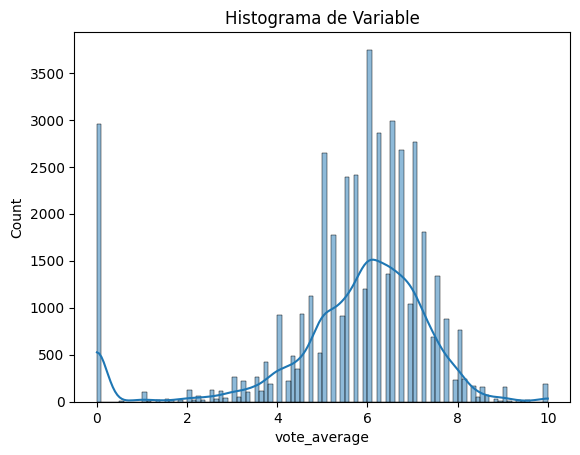

In [10]:
sns.histplot(data=data, x='vote_average', kde=True)
plt.title('Histograma de Variable')
plt.show()

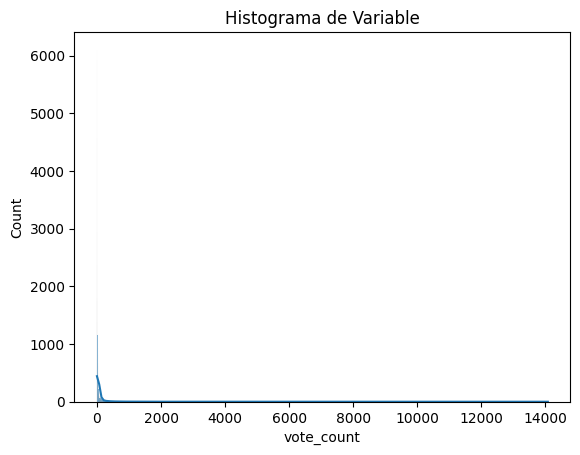

In [11]:
sns.histplot(data=data, x='vote_count', kde=True)
plt.title('Histograma de Variable')
plt.show()

Luego de ver estas graficas decidi utilizar la columna vote_average para utilizarla en el modelo de machine learning para buscar las similitudes de puntaje entre las peliculas.

Visualización de palabras frecuentes

In [12]:
import nltk
nltk.download('punkt')  # Descarga los recursos necesarios para tokenizar texto
nltk.download('stopwords')  # Descarga las stopwords (palabras comunes)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Outlet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Outlet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Convertir la columna de títulos en una lista
titulos = data['title'].tolist()

Tokeniza los títulos en palabras individuales y realiza cualquier otro preprocesamiento necesario, como eliminación de puntuación, conversiones de mayúsculas a minúsculas, etc. Además, excluye las palabras comunes utilizando stopwords

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

stopwords = set(stopwords.words('english'))  # Obtén las stopwords en inglés
tokens = []

for titulo in titulos:
    titulo = titulo.lower()  # Convertimos el texto a minúsculas
    titulo_tokens = word_tokenize(titulo)  # Tokenizamos el título en palabras
    titulo_tokens = [word for word in titulo_tokens if word.isalpha()]  # Eliminamos la puntuación
    titulo_tokens = [word for word in titulo_tokens if word not in stopwords]  # Excluimos las stopwords
    tokens.extend(titulo_tokens)  # Agregamos las palabras tokenizadas a una lista


In [15]:
# Cuenta la frecuencia de cada palabra en los títulos
from nltk.probability import FreqDist

frecuencia = FreqDist(tokens)


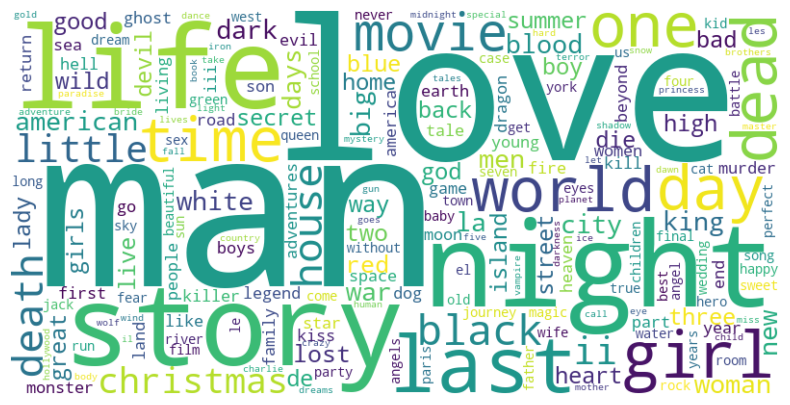

In [16]:
# Visualiza las palabras frecuentes en un gráfico de nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crea un objeto WordCloud con las palabras y sus frecuencias, excluyendo stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate_from_frequencies(frecuencia)

# Muestra la nube de palabras en un gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
